# Billboard Hot 100 #1 Singles of the 2020s — Data Analysis

### Name: Gina Socolich
### Date: 13 May 2025

## Dataset Reference
This project uses data from the following source:

> **Wikipedia contributors.** *List of Billboard Hot 100 number-one singles of the 2020s.*  
> Wikipedia, The Free Encyclopedia. Accessed May 2025.  
> Available at: [https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number-one_singles_of_the_2020s](https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number-one_singles_of_the_2020s)

> Dataset Source: https://github.com/socolich-gina/Final-Milestone-Project/blob/main/billboard_hot_100_2020s.csv

## Project Overview
This notebook explores trends in Billboard Hot 100 number-one singles throughout the 2020s. These trends are useful for record labels and streaming services aiming to increase listeners. 

#### Import the data into the pandas dataframe. 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [15]:
url = 'https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number-one_singles_of_the_2020s?'

#### Use pandas to read the url and determine how many tables there are. 

In [16]:
tables = pd.read_html(url)
len(tables)

7

#### List all of the tables in the url.

In [17]:
for table in tables:
    print(table)

  Billboard Hot 100 & Best Sellers in Stores number-one singles by decade
                                                       Before August 1958
0                                1940–1949 1950–1958                     
1                                  After August 1958                     
2  1958–1969 1970–1979 1980–1989 1990–1999 2000–2...                     
3                US Singles Chart Billboard magazine                     
                          Contents
0  ← 2010s202020212022202320242025
       # Reached number one                               Artist(s)  \
    2020               2020                                    2020   
0   1096   January 18, 2020                             Roddy Ricch   
1   1097      April 4, 2020                              The Weeknd   
2   1098     April 18, 2020                                   Drake   
3   1099        May 9, 2020  The Scotts (Travis Scott and Kid Cudi)   
4   1100       May 16, 2020          Doja Cat featuring Nick

#### Determine the amount of columns and rows in each of the tables.

In [18]:
for table in tables:
    print(table.shape)

(4, 1)
(1, 1)
(94, 7)
(16, 3)
(10, 3)
(12, 4)
(7, 2)


#### Determine what each of the columns are in each of the tables. 

In [19]:
for table in tables:
    print(table.columns)

MultiIndex([('Billboard Hot 100 & Best Sellers in Stores number-one singles by decade', ...)],
           )
Index(['Contents'], dtype='object')
MultiIndex([(                  '#', '2020'),
            ( 'Reached number one', '2020'),
            (          'Artist(s)', '2020'),
            (             'Single', '2020'),
            ('Weeks at number one', '2020'),
            (         'References', '2020'),
            ( 'Unnamed: 6_level_0', '2020')],
           )
Index(['Artist', 'Number-one singles', 'Singles'], dtype='object')
Index(['Artist', 'Weeks at number one', 'Singles'], dtype='object')
Index(['Song', 'Artist(s)', 'Weeks at number one', 'References'], dtype='object')
Index(['vteLists of Billboard number-one singles', 'vteLists of Billboard number-one singles.1'], dtype='object')


#### View the first and last few rows in each of the tables. 

In [20]:
for table in tables:
    print("\n")
    print(table.head(), table.tail())



  Billboard Hot 100 & Best Sellers in Stores number-one singles by decade
                                                       Before August 1958
0                                1940–1949 1950–1958                     
1                                  After August 1958                     
2  1958–1969 1970–1979 1980–1989 1990–1999 2000–2...                     
3                US Singles Chart Billboard magazine                        Billboard Hot 100 & Best Sellers in Stores number-one singles by decade
                                                       Before August 1958
0                                1940–1949 1950–1958                     
1                                  After August 1958                     
2  1958–1969 1970–1979 1980–1989 1990–1999 2000–2...                     
3                US Singles Chart Billboard magazine                     


                          Contents
0  ← 2010s202020212022202320242025                           Contents
0  

#### **Data Extraction & Cleaning**

In [21]:
tables = pd.read_html(url)

df = tables[2]

df.columns = df.columns.droplevel(1)

df = df[df['#'] != '#']

df = df.rename(columns={'#': 'Chart Number', 'Reached number one': 'Date', 'Artist(s)': 'Artist', 'Single': 'Song', 'Weeks at number one': 'Weeks at #1'})

# ChatGPT
df['Weeks at #1'] = pd.to_numeric(df['Weeks at #1'], errors='coerce')
df['Artist'] = df['Artist'].str.replace(r'\[.*?\]', '', regex=True)
df = df.dropna(subset=['Weeks at #1'])

In [22]:
df.to_csv('billboard_hot_100_2020s.csv', index=False)

#### Question #1: Which artists have had the most #1 songs over time?

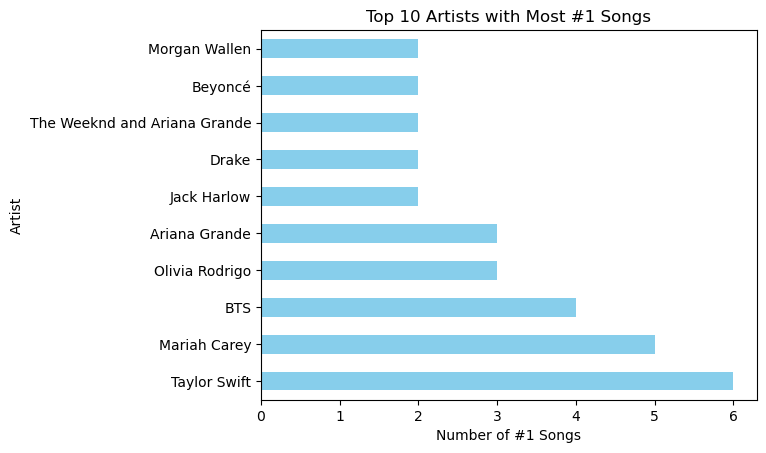

In [23]:
artist_counts = df['Artist'].value_counts().head(10)

artist_counts.plot(kind='barh', color='skyblue')
plt.title('Top 10 Artists with Most #1 Songs')
plt.xlabel('Number of #1 Songs')
plt.ylabel('Artist')
plt.show()

##### **Taylor Swift**, **Mariah Carey**, and **BTS** have had the most #1 songs of the 2020s so far. 

#### Question #2: Which songs stayed #1 the longest?

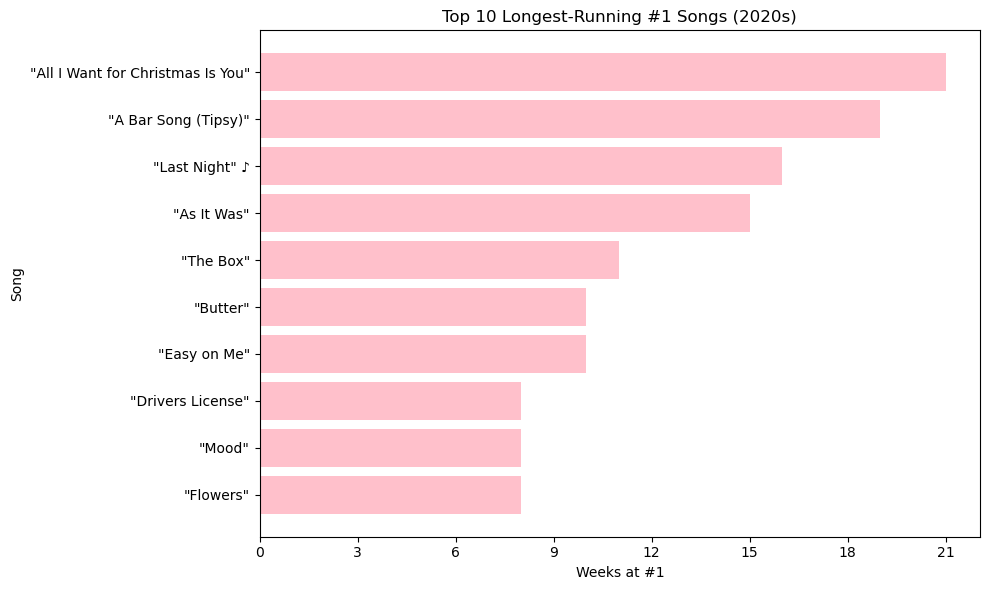

In [24]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number-one_singles_of_the_2020s')
df = tables[2]

df.columns = df.columns.droplevel(1)

df = df[df['#'] != '#']

df = df.rename(columns={'#': 'Chart Number','Reached number one': 'Date','Artist(s)': 'Artist','Single': 'Song','Weeks at number one': 'Weeks at #1'})

# ChatGPT
df['Song'] = df['Song'].str.replace(r'\[.*?\]', '', regex=True).str.strip()
df['Weeks at #1'] = pd.to_numeric(df['Weeks at #1'], errors='coerce')

df = df[df['Weeks at #1'] <= 30]

df = df.drop_duplicates(subset='Song')

top_songs = df.sort_values(by='Weeks at #1', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_songs['Song'], top_songs['Weeks at #1'], color='pink')
plt.title('Top 10 Longest-Running #1 Songs (2020s)')
plt.xlabel('Weeks at #1')
plt.ylabel('Song')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

##### **"All I Want for Christmas Is You"**, **A Bar Song (Tipsy)"**, and **"Last Night"** have obtained the most weeks on the Billboard Hot 100s List. 

#### Question #3: How common are collaborations/features in these songs?

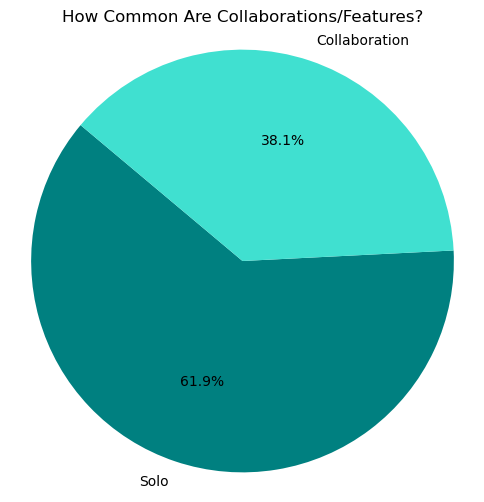

In [25]:
collab_keywords = ['feat', 'Feat', 'featuring', 'Featuring', '&', ',', ' and ', ' x ', ' with ']
df['Is Collaboration'] = df['Artist'].apply(lambda x: any(keyword in x for keyword in collab_keywords)) # ChatGPT

collab_counts = df['Is Collaboration'].value_counts()
labels = ['Solo', 'Collaboration']
colors = ['teal', 'turquoise']

plt.figure(figsize=(6, 6))
plt.pie(collab_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors) # ChatGPT
plt.title('How Common Are Collaborations/Features?')
plt.axis('equal')
plt.show()

##### **Solo artists** are more popular for #1 songs verses collaborations and features.

#### Question #4: What words are most common in the song titles of these top hits?

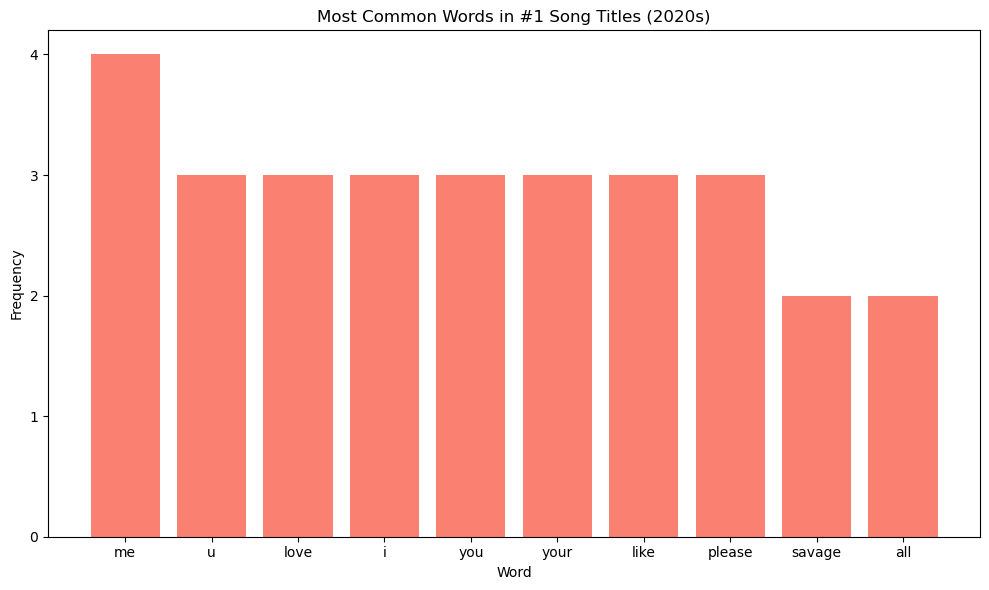

In [26]:
# ChatGPT
from collections import Counter

words = df['Song'].str.lower().str.replace(r'[^\w\s]', '', regex=True).str.split()
flat_words = [word for song in words for word in song]

# remove common stop words
stop_words = {'the', 'a', 'and', 'to', 'of', 'in', 'on', 'for', 'with', 'at', 'is'}
filtered_words = [word for word in flat_words if word not in stop_words]

word_counts = Counter(filtered_words)
common_words = word_counts.most_common(10)

word_labels, word_freqs = zip(*common_words)

plt.figure(figsize=(10, 6))
plt.bar(word_labels, word_freqs, color='salmon')
plt.title('Most Common Words in #1 Song Titles (2020s)')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

##### **Romantic** and **relatable** words are most popular amongst #1 song titles. 